In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import metrics

Using TensorFlow backend.


In [2]:
path = '/Users/irashokar/documents/NOvA_2/files/Feb_test_ii/descr_iii/'
path2 = '/Users/irashokar/documents/NOvA_2/files/Feb_test_ii/descr_ii/'
history = pkl.load(open(path + 'history_train_100_descr_32_sgd_22_02.pkl','rb'))

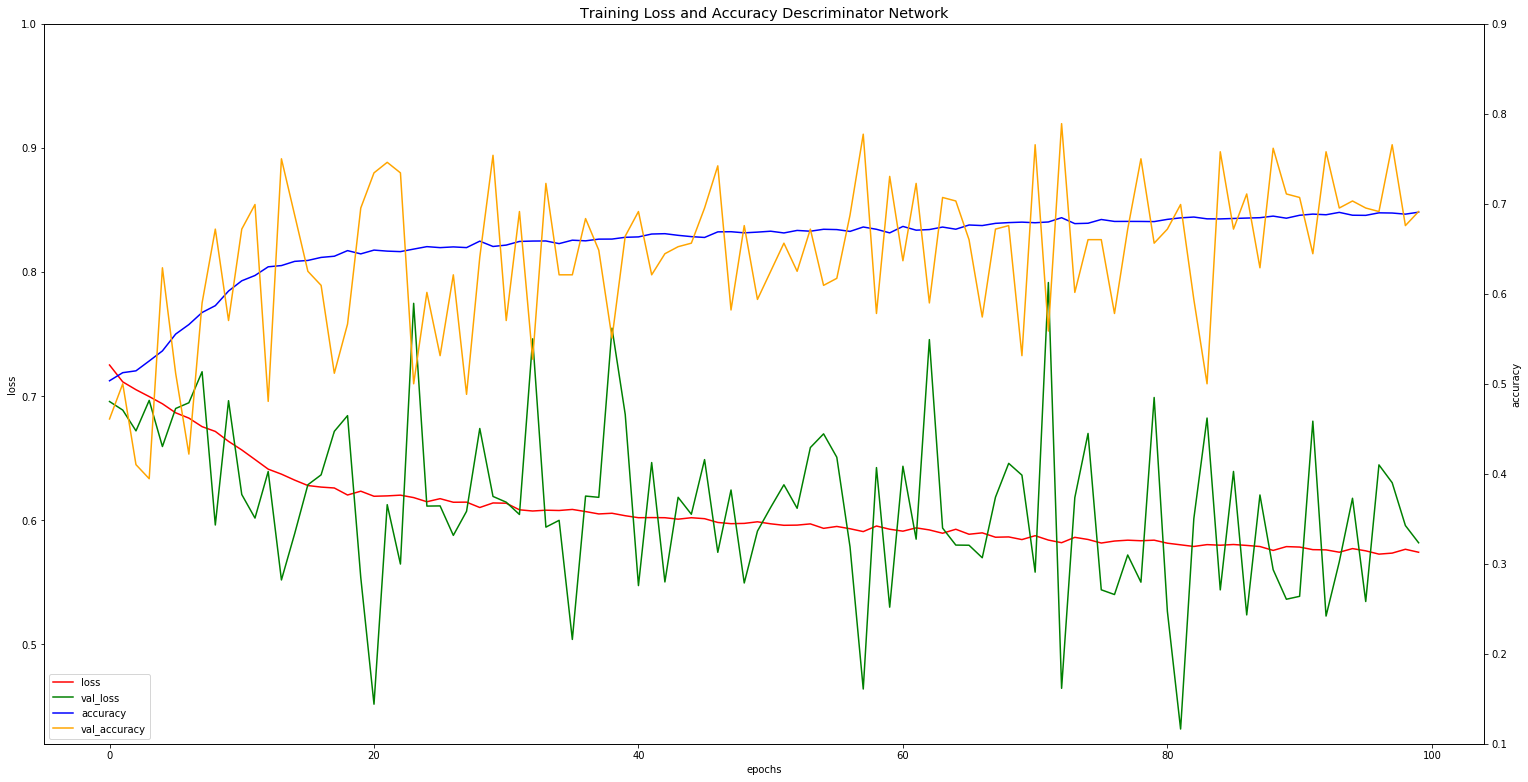

In [3]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx() 


lns1 = ax1.plot(history.history['loss'], color='red', label='loss')
lns2 = ax1.plot(history.history['val_loss'], color='green', label='val_loss')

lns3 = ax2.plot(history.history['accuracy'], color='blue', label='accuracy')
lns4 = ax2.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')


leg = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=3)
plt.title('', fontsize=20)

plt.rcParams.update({'font.size': 12})

ax1.set_ylim(0.42, 1.0)
ax1.set_ylabel('loss')

ax2.set_ylim(0.1, 0.9)
ax2.set_ylabel('accuracy')

ax1.set_xlabel('epochs')
ax1.set_title('Training Loss and Accuracy Descriminator Network')

plt.show()

In [4]:
probabilities = pkl.load(open(path+ 'test_probabilities_default_TOboth_equal_1__train_100_descr_32_sgd_22_02.pkl','rb'))
node_values = pkl.load(open(path2+ 'nodes_values_default_TOboth_equal_1__32_Adam_2_descr.pkl','rb'))
df = pkl.load(open(path+ 'test_df_default_TOboth_equal_1__train_100_descr_32_sgd_22_02.pkl','rb'))
print(len(probabilities))

10708


In [5]:
df.head()

,cycle,evt,file,label,run,subevt,subrun,train_index,weight
0,1,1131,/unix/nova/hdf5/ND-ProngCVN-FHC/neardet_genie_...,1,10392,6,30,3696,10
1,0,1732,/unix/nova/hdf5/ND-ProngCVN-FHC/neardet_genie_...,1,10542,1,1,5883,10
2,5,362,/unix/nova/hdf5/ND-GIBUU-FHC/neardet_gibuu_non...,1,12077,6,0,2496,6
3,2,1556,/unix/nova/hdf5/ND-ProngCVN-FHC/neardet_genie_...,3,10560,7,0,5428,10
4,2,368,/unix/nova/hdf5/ND-GIBUU-FHC/neardet_gibuu_non...,1,12066,2,9,2430,2


In [6]:
predictions = []
for i in probabilities:
    genie = i[0][0]
    gibuu = i[0][1]
    if genie>gibuu:
        predictions.append(0)
    else:
        predictions.append(1)
    
test_vals = list(df['label'])
    
events = []
for row in df['file']:
    if '_genie_' in str(row):
        events.append(0)
    elif 'gibuu' in str(row):
        events.append(1)
    
#accuracy
acc = 0
for i in range(len(probabilities)):
    if events[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(events[:10])

Probabilities: 

Accuracy:0.673141576391483 

[[0.5859053  0.41409466]] 

[[0.19318402 0.806816  ]] 

[[0.5955352 0.4044648]] 

[[0.6758846  0.32411534]] 

[[0.5856382  0.41436183]] 

[[0.68439287 0.31560713]] 

[[0.15984592 0.84015405]] 

[[0.2661903 0.7338097]] 

[[0.50425833 0.49574167]] 

[[0.6486358  0.35136417]] 

Predictions: 

[0, 1, 0, 0, 0, 0, 1, 1, 0, 0] 

Truth labels: 

[0, 0, 1, 0, 1, 1, 1, 1, 1, 0]


Text(0, 0.5, 'Count')

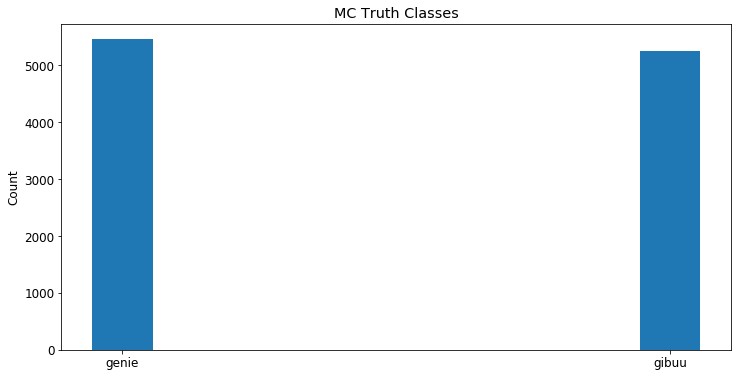

In [33]:
plt.figure(figsize=(12,6))
plt.hist(events)
x = [0.05, 0.95]
class_names = ['genie', 'gibuu']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

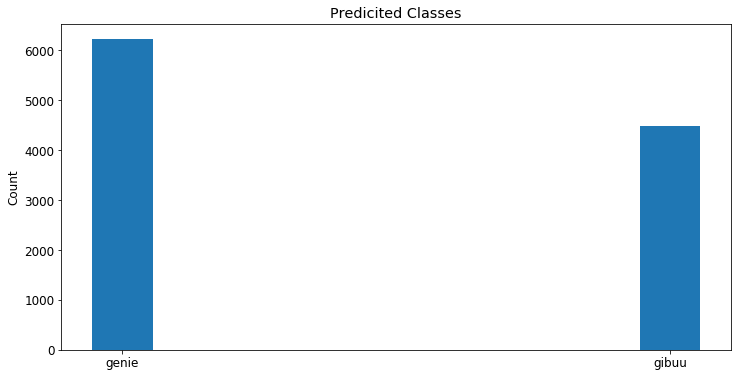

In [34]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.05, 0.95]
class_names = ['genie', 'gibuu']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

[(0, 1)]

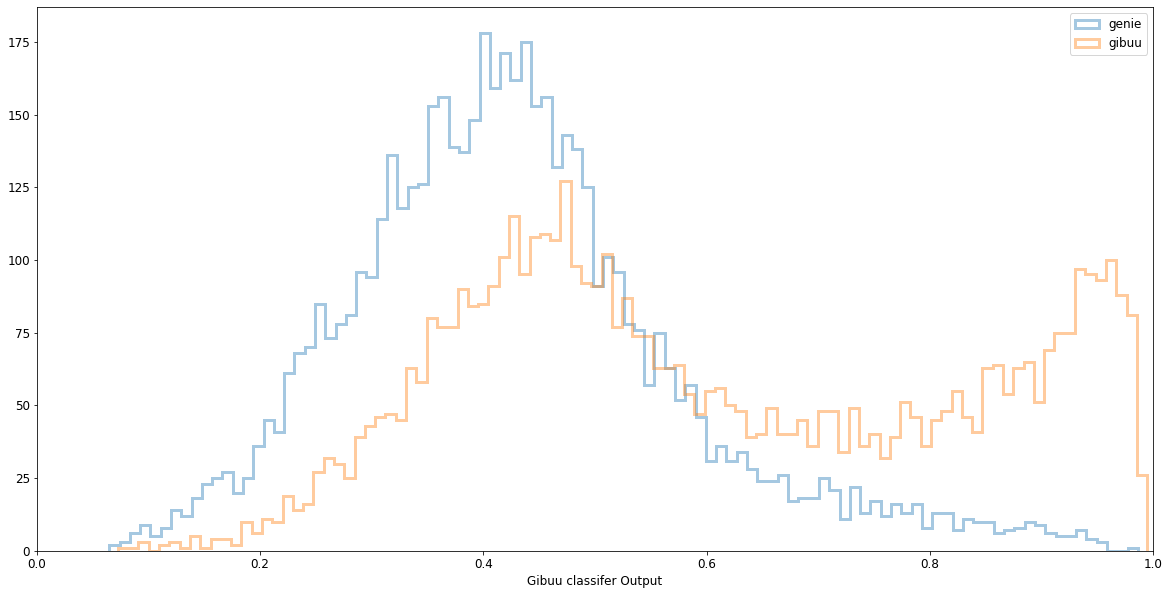

In [35]:
genie = []
gibuu = []
for i in range(len(probabilities)):
    if events[i] ==0 :
        genie.append(probabilities[i][0][1])
    elif events[i] ==1:
        gibuu.append(probabilities[i][0][1])
        
plt.figure(figsize=(20,10))
g = sns.distplot(genie, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(gibuu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['genie', 'gibuu'], loc='upper right')
plt.xlabel('Gibuu classifer Output')
g.set(xlim=(0,1))

[(0, 1)]

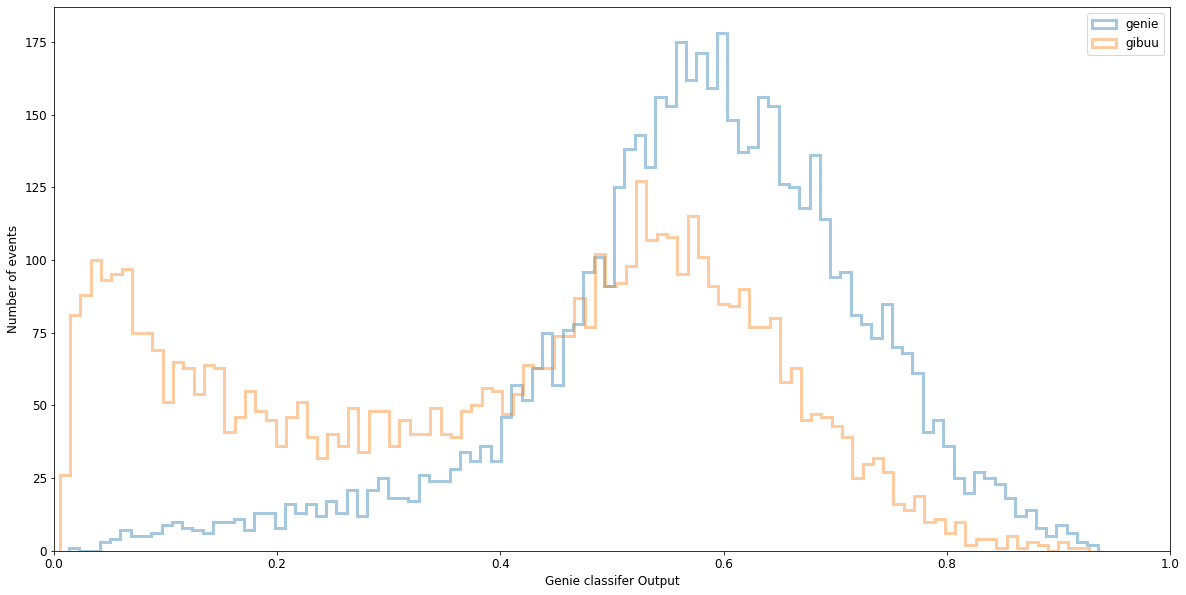

In [36]:
genie = []
gibuu = []
for i in range(len(probabilities)):
    if events[i] ==0 :
        genie.append(probabilities[i][0][0])
    elif events[i] ==1:
        gibuu.append(probabilities[i][0][0])
        
plt.figure(figsize=(20,10))
g = sns.distplot(genie, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
g = sns.distplot(gibuu, bins = 100, kde=False, hist_kws={"histtype": "step", "linewidth": 3})
plt.legend(['genie', 'gibuu'], loc='upper right')
plt.xlabel('Genie classifer Output')
plt.ylabel('Number of events')
g.set(xlim=(0,1))

Text(0.5, 1.0, 'ROC curve')

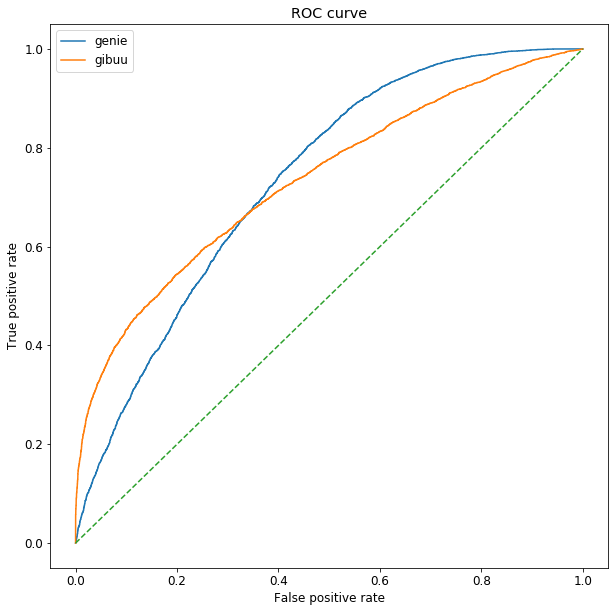

In [37]:
pr_genie = []
pr_gibuu = []
for i in range(len(probabilities)):
    pr_genie.append(probabilities[i][0][0])
    pr_gibuu.append(probabilities[i][0][1])

genie_fpr, genie_tpr, genie_thresholds = metrics.roc_curve(events, pr_genie, pos_label=0)
gibuu_e_fpr, gibuu_e_tpr, gibuu_e_thresholds = metrics.roc_curve(events, pr_gibuu, pos_label=1)

plt.figure(figsize=(10,10))
plt.plot(genie_fpr, genie_tpr, label = 'genie')
plt.plot(gibuu_e_fpr, gibuu_e_tpr, label = 'gibuu')
plt.legend(['genie', 'gibuu'], loc='upper left')
plt.plot([0,1], [0,1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [3]:
df2 = pkl.load(open(path + 'df_physics.pkl','rb'))
df3 = pkl.load(open('df_physics_genie_under.pkl','rb'))
df4 = pkl.load(open('df_physics_gib_over.pkl','rb'))

In [4]:
df = pd.read_csv('physics_data.csv')

In [5]:
df.columns = ['E', 'L', 'W2', 'cycle', 'eff', 'evt', 'generator', 'genweight', 'hitnuc', 'inttype', 'iscc', 'ischarm', 'isseaquark', 'isvtxcont', 'mode', 'nhitslc', 'nhittot', 'nneutron', 'npiminus', 'npiplus', 'npizero', 'nproton', 'p.E', 'p.px', 'p.py', 'p.pz', 'pdg', 'pdgorig', 'pur', 'q2', 'rec.mc.nu_idx', 'resnum', 'run', 'subevt', 'subrun', 'tgtA', 'tgtZ', 'time', 'visE', 'visEBirks', 'visENeutron', 'visENeutronBirks', 'visEinslc', 'visEinslcBirks', 'visEinslcNeutron', 'visEinslcNeutronBirks', 'vtx.x', 'vtx.y', 'vtx.z', 'woscdumb', 'x', 'xsec', 'y', 'dataset']

In [6]:
df_ =  df['dataset']==4
df = df[df_]

(array([6.65891473e+00, 3.22868217e+00, 1.48062016e+00, 7.24806202e-01,
        4.26356589e-01, 2.36434109e-01, 2.32558140e-01, 2.24806202e-01,
        1.70542636e-01, 7.75193798e-02, 4.65116279e-02, 5.03875969e-02,
        4.65116279e-02, 2.71317829e-02, 7.75193798e-03, 3.10077519e-02,
        1.93798450e-02, 3.87596899e-03, 7.75193798e-03, 0.00000000e+00,
        3.87596899e-03, 0.00000000e+00, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.87596899e-03]),
 array([  5. ,  36.7,  68.4, 100.1, 131.8, 163.5, 195.2, 226.9, 258.6,
        290.3, 322. , 353.7, 385.4, 417.1, 448.8, 480.5, 512.2, 543.9,
        575.6, 607.3, 639. , 670.7, 702.4, 734.1, 765.8, 797.5, 829.2,
        860.9, 892.6, 924.3, 956. ]),
 <a list of 1 Patch objects>)

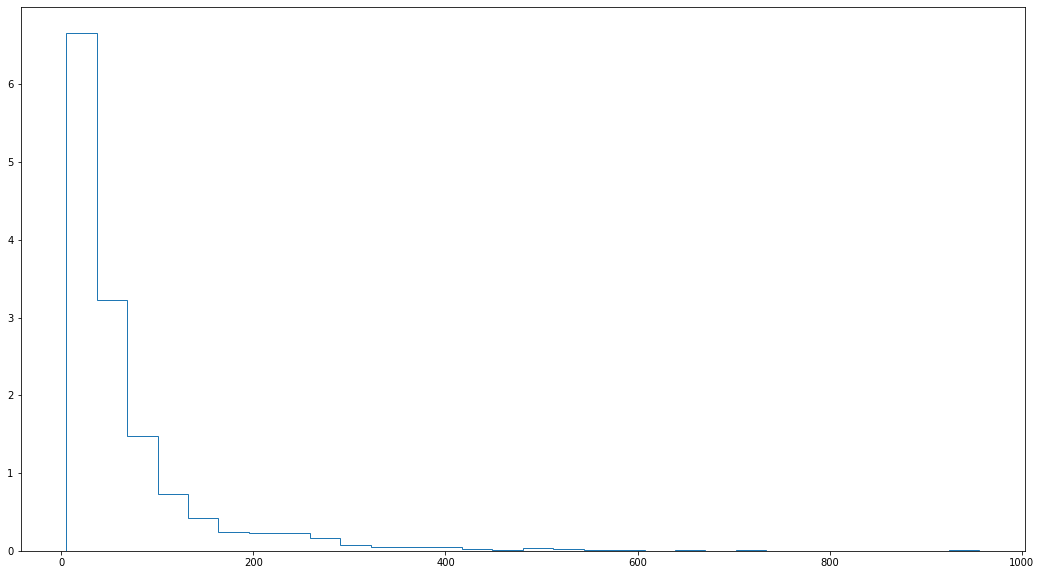

In [7]:
plt.figure(figsize=(18,10))
(counts, bins) = np.histogram(df['nhitslc'], bins=30)
factor = 1/(len(df2['nhitslc']))
plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='Gibuu<0.2')

In [8]:
cols = ['E', 'L', 'W2', 'cycle', 'eff', 'evt', 'generator', 'genweight', 'hitnuc', 'inttype', 'iscc', 'ischarm', 'isseaquark', 'isvtxcont', 'mode', 'nhitslc', 'nhittot', 'nneutron', 'npiminus', 'npiplus', 'npizero', 'nproton', 'p.E', 'p.px', 'p.py', 'p.pz', 'pdg', 'pdgorig', 'pur', 'q2', 'rec.mc.nu_idx', 'resnum', 'run', 'subevt', 'subrun', 'tgtA', 'tgtZ', 'time', 'visE', 'visEBirks', 'visENeutron', 'visENeutronBirks', 'visEinslc', 'visEinslcBirks', 'visEinslcNeutron', 'visEinslcNeutronBirks', 'vtx.x', 'vtx.y', 'vtx.z', 'woscdumb', 'x', 'xsec', 'y', 'dataset']
len(cols)


54

In [13]:
def plots(text, bins):
    
    plt.figure(figsize=(18,10))
    (counts, bins) = np.histogram(df[text], bins=bins)
    factor = 1/(len(df[text]))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label= 'Gibuu>0.3')

    (counts, bins) = np.histogram(df2[text], bins=bins)
    factor = 1/(len(df2[text]))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='Gibuu<0.2')
    
    (counts, bins) = np.histogram(df3[text], bins=bins)
    factor = 1/(len(df3[text]))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label= 'Genie<0.2')
    


    #(counts, bins) = np.histogram(df4[text], bins=bins)
    #factor = 1/(len(df4[text]))
    #plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='0.4<Genie<0.7')
    plt.legend(prop={'size': 14})
    plt.ylabel('Percentage of Data')
    plt.xlabel(text, 'GeV')
    plt.show()

AttributeError: 'str' object has no attribute 'pop'

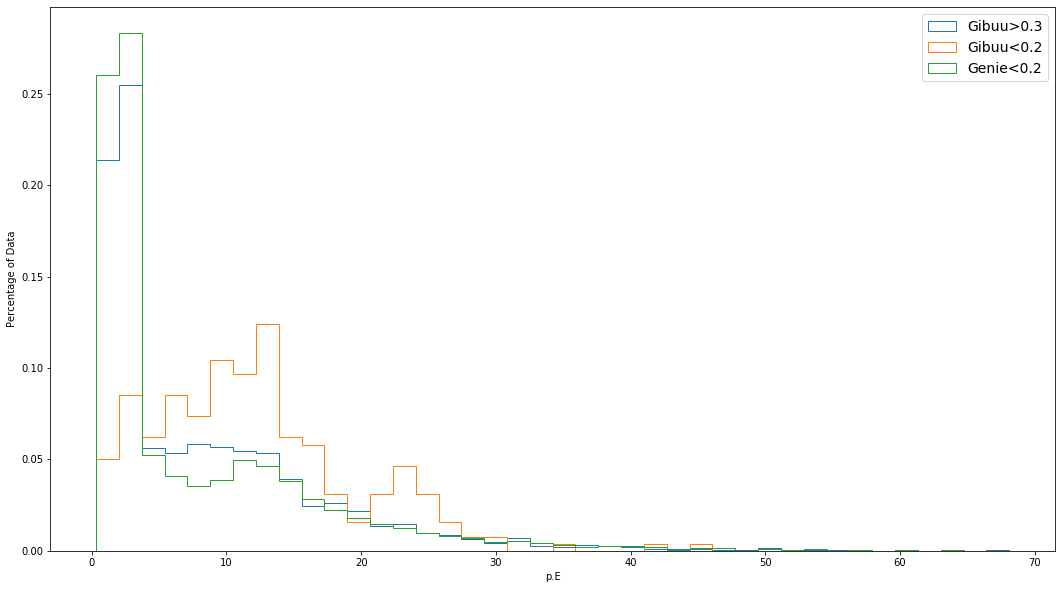

In [14]:
lab = ['p.E', 'E', 'nhitslc', 'p.pz', 'visE']
for i in lab:
    plots(i, 40)

In [24]:
print(df2.columns)
df2.head(20)

Index(['E', 'L', 'W2', 'cycle', 'eff', 'evt', 'generator', 'genweight',
       'hitnuc', 'inttype', 'iscc', 'ischarm', 'isseaquark', 'isvtxcont',
       'mode', 'nhitslc', 'nhittot', 'nneutron', 'npiminus', 'npiplus',
       'npizero', 'nproton', 'p.E', 'p.px', 'p.py', 'p.pz', 'pdg', 'pdgorig',
       'pur', 'q2', 'rec.mc.nu_idx', 'resnum', 'run', 'subevt', 'subrun',
       'tgtA', 'tgtZ', 'time', 'visE', 'visEBirks', 'visENeutron',
       'visENeutronBirks', 'visEinslc', 'visEinslcBirks', 'visEinslcNeutron',
       'visEinslcNeutronBirks', 'vtx.x', 'vtx.y', 'vtx.z', 'woscdumb', 'x',
       'xsec', 'y'],
      dtype='object')


,E,L,W2,cycle,eff,evt,generator,genweight,hitnuc,inttype,...,visEinslcBirks,visEinslcNeutron,visEinslcNeutronBirks,vtx.x,vtx.y,vtx.z,woscdumb,x,xsec,y
0,10.327614,0.998015,7.805746,4.0,0.962082,124.0,1.0,0.000000,2212.0,1092.0,...,1.648078,0.098042,0.052015,-162.550903,24.847170,596.774597,1.000000,0.159315,9.629091e-11,0.424695
1,17.397940,0.885565,19.000101,0.0,0.978438,732.0,1.0,1.358608,-1.0,-1.0,...,5.763856,0.286464,0.165884,94.422211,80.542015,267.218597,1.000000,0.133021,1.176115e-10,0.645263
2,26.538841,0.993083,22.938742,9.0,0.994050,893.0,1.0,0.019185,-1.0,-1.0,...,14.077181,1.279735,0.965127,79.497604,-70.984917,40.061333,0.991411,0.529245,1.321057e-09,0.948273
3,5.774498,0.985773,8.473740,6.0,0.973271,1218.0,1.0,0.000000,2212.0,1091.0,...,2.981023,0.137162,0.073440,-40.701519,-28.753387,291.969788,0.828834,0.061242,4.727000e-12,0.745830
4,9.348126,0.999868,9.597542,7.0,0.999396,1026.0,1.0,0.384615,-1.0,-1.0,...,5.123022,0.003812,0.003704,173.197983,175.766647,28.266481,0.932170,0.481276,9.893342e-10,0.966346
5,24.011986,0.986062,13.923827,4.0,0.989624,726.0,1.0,0.000000,2112.0,1091.0,...,10.227166,0.308608,0.229082,-169.857132,-155.119354,166.712891,0.998951,0.278928,2.728022e-09,0.401133
6,1.870059,0.432748,0.899648,1.0,0.955913,444.0,1.0,45.577206,-1.0,-1.0,...,0.553486,0.121274,0.077806,77.082878,146.711563,484.554504,0.062995,0.987984,7.412386e-11,0.763358
7,14.239885,0.999223,10.864749,2.0,0.972150,45.0,1.0,0.000000,2212.0,1092.0,...,2.831350,0.821252,0.717431,-40.055950,11.597537,144.502609,1.000000,0.141301,2.253891e-11,0.434774
8,13.090212,0.814412,0.945966,3.0,1.000000,690.0,1.0,0.000000,2112.0,1001.0,...,7.581892,0.000000,0.000000,-122.845146,-58.068531,356.073456,0.996501,0.408595,5.552679e-10,0.004430
9,41.433083,1.012618,11.456699,5.0,0.976152,842.0,1.0,1.000000,2112.0,1091.0,...,4.712612,0.686529,0.475917,76.850357,-101.265999,1103.999878,0.996470,0.509170,1.407131e-08,0.276917
